In [1]:
import Levenshtein as L

In [2]:
import pandas as pd
df = pd.DataFrame( { 'a' : [1, 2, 1, 2], 'b': [ 'x', 'x', 'y', 'y'] })
df

,a,b
0,1,x
1,2,x
2,1,y
3,2,y


In [3]:
df['value'] = df.apply(lambda row: str(row.a) + ' + ' + row.b, axis=1)
df

,a,b,value
0,1,x,1 + x
1,2,x,2 + x
2,1,y,1 + y
3,2,y,2 + y


In [4]:
new_df = df.pivot(index='a', columns='b', values='value')
new_df

b,x,y
a,,
1,1 + x,1 + y
2,2 + x,2 + y


In [5]:
Students = pd.DataFrame({'student_id': [1, 2], 'name': ['Alice', 'Bob']})
Students

,name,student_id
0,Alice,1
1,Bob,2


In [6]:
Grades = pd.DataFrame({'student_id': [1, 1, 2, 2], 'class_id': [1, 2, 1, 3], 'grade': ['A', 'C', 'B', 'B']})
Grades

,class_id,grade,student_id
0,1,A,1
1,2,C,1
2,1,B,2
3,3,B,2


In [7]:
pd.merge(Students, Grades, on='student_id')

,name,student_id,class_id,grade
0,Alice,1,1,A
1,Alice,1,2,C
2,Bob,2,1,B
3,Bob,2,3,B


In [8]:
Classes = pd.DataFrame({'class_id': [1, 2, 3], 'title': ['Math', 'English', 'Spanish']})
mergedCG = pd.merge(Classes, Grades)
mergedCGS = pd.merge(Students, mergedCG, on = 'student_id')
mergedCGS

,name,student_id,class_id,title,grade
0,Alice,1,1,Math,A
1,Alice,1,2,English,C
2,Bob,2,1,Math,B
3,Bob,2,3,Spanish,B


In [9]:
mergedCGS[mergedCGS['name'] == 'Alice'][mergedCGS['grade'] == 'A']["title"]

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0    Math
Name: title, dtype: object

In [10]:
modifiedCGS = mergedCGS.pivot(index='name', columns='title', values='grade')
modifiedCGS = modifiedCGS.replace([None],"NaN")
modifiedCGS

title,English,Math,Spanish
name,,,
Alice,C,A,NaN
Bob,NaN,B,B


In [11]:
resto = pd.read_csv('restaurants.csv')
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 4 columns):
id         858 non-null int64
cluster    858 non-null int64
name       858 non-null object
city       858 non-null object
dtypes: int64(2), object(2)
memory usage: 26.9+ KB


In [12]:
resto[:10]

,id,cluster,name,city
0,560,453,2223,san francisco
1,781,675,103 west,atlanta
2,279,172,20 mott,new york
3,43,23,21 club,new york
4,44,23,21 club,new york city
5,280,173,9 jones street,new york
6,486,379,abbey,atlanta
7,145,74,abruzzi,atlanta
8,146,74,abruzzi,atlanta
9,561,454,acquarello,san francisco


In [13]:
clusters = pd.merge(resto, resto, on='cluster')
clusters = clusters[clusters.id_x != clusters.id_y]
clusters[:10]
clusters = clusters[clusters.id_x > clusters.id_y]
clusters[:10]

,id_x,cluster,name_x,city_x,id_y,name_y,city_y
5,44,23,21 club,new york city,43,21 club,new york
11,146,74,abruzzi,atlanta,145,abruzzi,atlanta
21,185,94,alain rondelli,san francisco,184,alain rondelli,san francisco
37,187,95,aqua,san francisco,186,aqua,san francisco
41,46,24,aquavit,new york city,45,aquavit,new york
47,2,0,arnie morton's of chicago,los angeles,1,arnie morton's of chicago,los angeles
50,4,1,art's deli,studio city,3,art's delicatessen,studio city
59,48,25,aureole,new york city,47,aureole,new york
63,148,75,bacchanalia,atlanta,147,bacchanalia,atlanta
78,6,2,bel-air hotel,bel air,5,hotel bel-air,bel air


In [14]:
resto['dummy'] = 0
prod = pd.merge(resto, resto, on='dummy')
prod

,id_x,cluster_x,name_x,city_x,dummy,id_y,cluster_y,name_y,city_y
0,560,453,2223,san francisco,0,560,453,2223,san francisco
1,560,453,2223,san francisco,0,781,675,103 west,atlanta
2,560,453,2223,san francisco,0,279,172,20 mott,new york
3,560,453,2223,san francisco,0,43,23,21 club,new york
4,560,453,2223,san francisco,0,44,23,21 club,new york city
5,560,453,2223,san francisco,0,280,173,9 jones street,new york
6,560,453,2223,san francisco,0,486,379,abbey,atlanta
7,560,453,2223,san francisco,0,145,74,abruzzi,atlanta
8,560,453,2223,san francisco,0,146,74,abruzzi,atlanta
9,560,453,2223,san francisco,0,561,454,acquarello,san francisco


In [15]:
del prod['dummy']
del resto['dummy']

In [16]:
print (len(prod), len(resto)**2)

736164 736164


In [17]:
prod[:10]

,id_x,cluster_x,name_x,city_x,id_y,cluster_y,name_y,city_y
0,560,453,2223,san francisco,560,453,2223,san francisco
1,560,453,2223,san francisco,781,675,103 west,atlanta
2,560,453,2223,san francisco,279,172,20 mott,new york
3,560,453,2223,san francisco,43,23,21 club,new york
4,560,453,2223,san francisco,44,23,21 club,new york city
5,560,453,2223,san francisco,280,173,9 jones street,new york
6,560,453,2223,san francisco,486,379,abbey,atlanta
7,560,453,2223,san francisco,145,74,abruzzi,atlanta
8,560,453,2223,san francisco,146,74,abruzzi,atlanta
9,560,453,2223,san francisco,561,454,acquarello,san francisco


In [18]:
prod = prod[prod.id_x != prod.id_y]

In [19]:
prod = prod[prod.id_x > prod.id_y]
len(prod)

367653

In [20]:
import Levenshtein as L

In [21]:
L.distance('Hello, World!', 'Hallo, World!')

1

In [22]:
prod['distance'] = prod.apply(lambda r: L.distance(r['name_x'], r['name_y']), axis=1)

In [23]:
prod

,id_x,cluster_x,name_x,city_x,id_y,cluster_y,name_y,city_y,distance
2,560,453,2223,san francisco,279,172,20 mott,new york,6
3,560,453,2223,san francisco,43,23,21 club,new york,6
4,560,453,2223,san francisco,44,23,21 club,new york city,6
5,560,453,2223,san francisco,280,173,9 jones street,new york,14
6,560,453,2223,san francisco,486,379,abbey,atlanta,5
7,560,453,2223,san francisco,145,74,abruzzi,atlanta,7
8,560,453,2223,san francisco,146,74,abruzzi,atlanta,7
10,560,453,2223,san francisco,219,112,adriano's ristorante,los angeles,20
11,560,453,2223,san francisco,281,174,adrienne,new york,8
13,560,453,2223,san francisco,282,175,agrotikon,new york,9


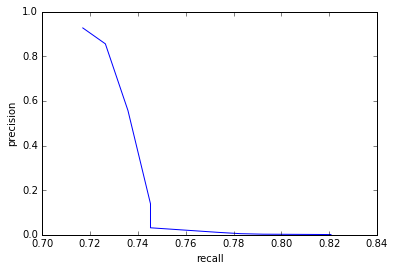

In [52]:
########Where are "good" points on the plot, and where are "bad" ones.
#(use recall as horizontal axis and precision as vertical axis)
%matplotlib inline
import pylab
import matplotlib.pyplot as pp

def accuracy(max_distance):
    similar = prod[prod.distance < max_distance]
    correct = float(sum(similar.cluster_x == similar.cluster_y))
    precision = correct / len(similar)
    recall = correct / len(clusters)
    return (precision, recall)

thresholds = range(1, 11)
p = []
r = []

for t in thresholds:
    acc = accuracy(t)
    p.append(acc[0])
    r.append(acc[1])

pylab.plot(r,p)
pylab.xlabel("recall")
pylab.ylabel("precision")


In [53]:
prod['ratio'] = prod.apply(lambda r: L.ratio(r['name_x'], r['name_y']), axis=1)

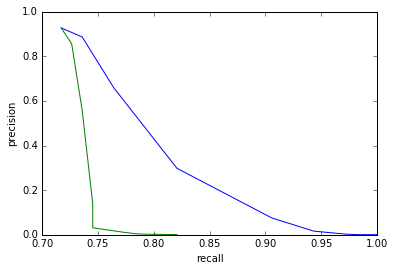

In [55]:
%matplotlib inline
import pylab
import numpy as np
import matplotlib.pyplot as pp

def accuracy_ratio(max_ratio):
    similar = prod[prod.ratio >= max_ratio]
    correct = float(sum(similar.cluster_x == similar.cluster_y))
    precision = correct / len(similar)
    recall = correct / len(clusters)
    return (precision, recall)

thresholds_ratio = np.arange(0.1,1.1,0.1)
p_ratio = []
r_ratio = []

for t in thresholds_ratio:
    acc_ratio = accuracy_ratio(t)
    p_ratio.append(acc_ratio[0])
    r_ratio.append(acc_ratio[1])

pylab.plot(r_ratio,p_ratio)
pylab.plot(r,p)
pylab.xlabel("recall")
pylab.ylabel("precision")